In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


Testing on TFIDF Vectorizer

In [ ]:
import os
train_fname = f"/content/gdrive/MyDrive/CS3244/Final/Updated/full_train_preprocessed_subset.csv"

train = pd.read_csv(train_fname)
train = train.drop(columns=['Unnamed: 0'])

test_fname = f"/content/gdrive/MyDrive/CS3244/Final/Updated/full_test_preprocessed_subset.csv"
test = pd.read_csv(test_fname)
test = test.drop(columns=['Unnamed: 0'])

val_fname = f"/content/gdrive/MyDrive/CS3244/Final/Updated/full_val_preprocessed_subset.csv"
val = pd.read_csv(val_fname)
val = val.drop(columns=['Unnamed: 0'])

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
# Combine train and val and perform 0.2 train test split
print(train.shape)
train_val = train.append(val)
train_val.shape

(133999, 14)


(151222, 14)

In [ ]:
train_val[['tokens']] = train_val.loc[:,['tokens']].fillna(value={})
test['tokens'] = test.loc[:,['tokens']].fillna(value={})

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = train_val['tokens'].astype(str)
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
X_test = vectorizer.transform(test['tokens'].astype(str))

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X, train_val['label'], test_size = 0.2, random_state = 1)
y_test = test['label']

In [ ]:
from sklearn.decomposition import TruncatedSVD
transformer = TruncatedSVD(300)
X_train_v2 = transformer.fit_transform(X_train)
X_test_v2 = transformer.transform(X_test)

In [ ]:
from sklearn.svm import SVC
import pickle
from sklearn.metrics import confusion_matrix
import matplotlib as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

In [ ]:
pipe_svd = Pipeline([('scaler', MinMaxScaler()), ('svc', SVC(kernel='rbf', gamma="scale"))])
pipe_svd.fit(X_train_v2, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()), ('svc', SVC())])

In [ ]:
predicted_svd = pipe_svd.predict(X_test_v2)

In [ ]:
print(accuracy_score(y_test,predicted_svd))
print(classification_report(y_test,predicted_svd))

0.3730293617769443
              precision    recall  f1-score   support

           0       0.55      0.43      0.48      3934
           1       0.35      0.36      0.35      3546
           2       0.38      0.15      0.21      2911
           3       0.31      0.68      0.43      3619
           4       0.40      0.17      0.24      3053

    accuracy                           0.37     17063
   macro avg       0.40      0.36      0.34     17063
weighted avg       0.40      0.37      0.35     17063



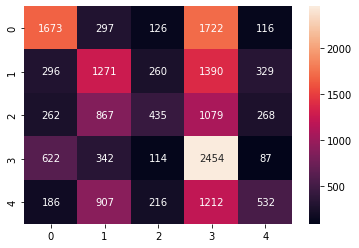

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sb
cf_matrix = confusion_matrix(y_test,predicted_svd)  
sb.heatmap(cf_matrix, annot=True, fmt='g')